In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [263]:
from sklearn.datasets import load_boston
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset.columns = boston.feature_names
dataset['PRICE'] = boston.target 
print(dataset.shape)

(506, 14)


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


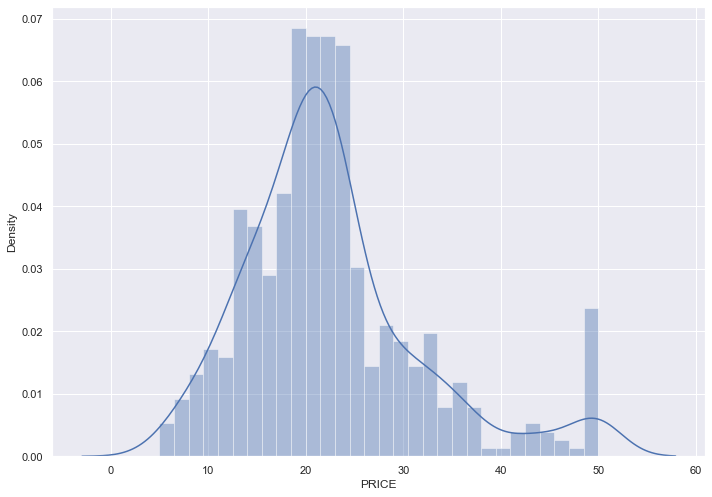

In [264]:
# Plotting the dataset
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['PRICE'], bins=30)
plt.show()

In [265]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [266]:
# Checking unique number of values
dataset.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [267]:
# Check missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [268]:
# Finding correlation between features
corr = dataset.corr()
corr.shape

(14, 14)

<AxesSubplot:>

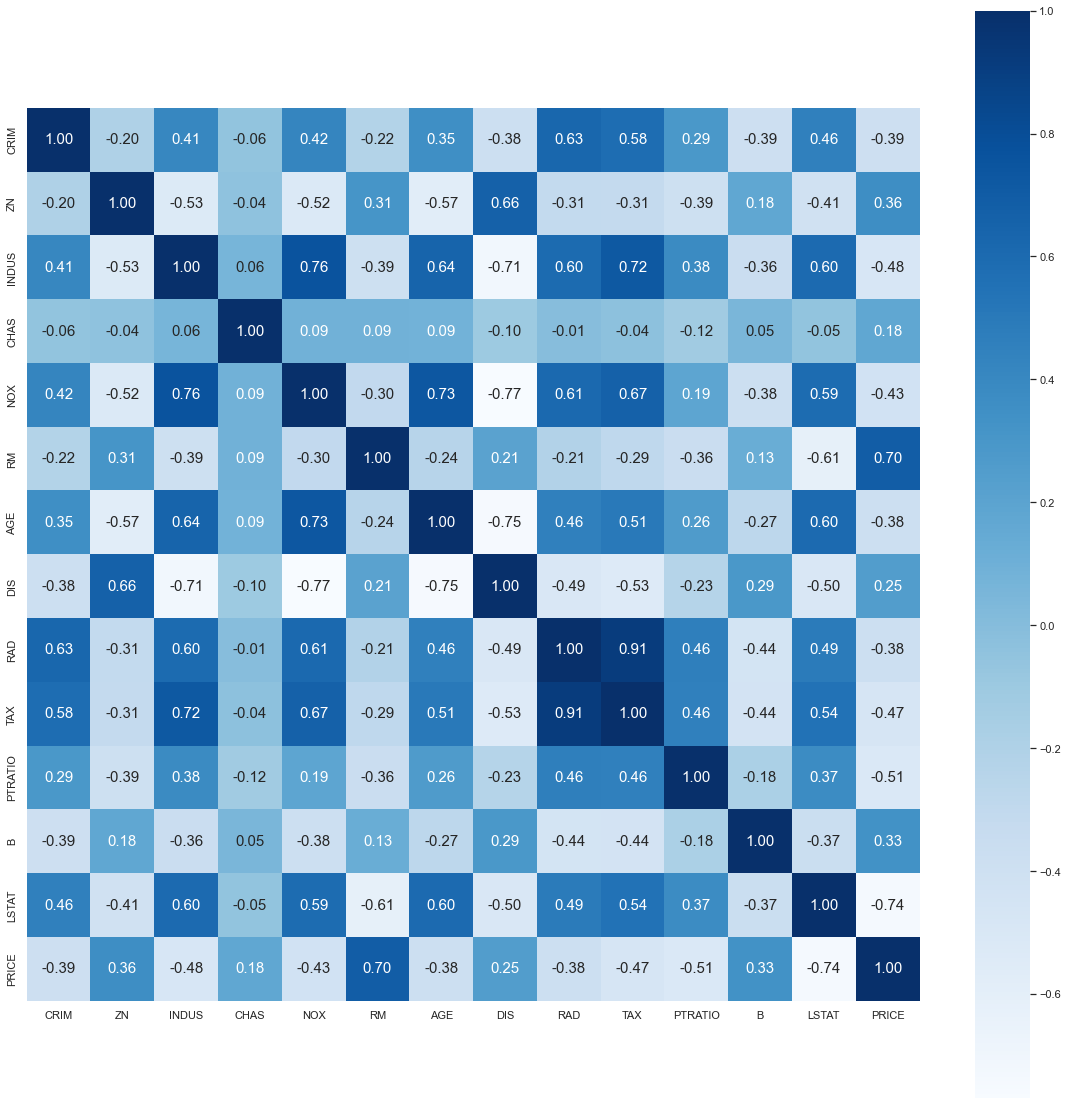

In [269]:
# Plotting heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Blues')

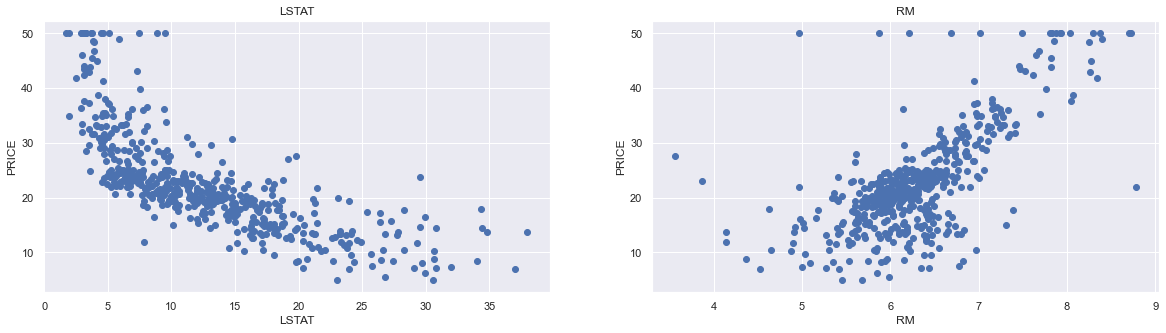

In [270]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = dataset['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [271]:
# Spliting target and features
X = dataset.drop(['PRICE'], axis = 1)
y = dataset['PRICE']

In [272]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(409, 13)
(51, 13)
(46, 13)
(409,)
(51,)
(46,)


In [273]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [274]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [275]:
EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, verbose=0)

In [276]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
95,50.271275,5.142365,50.271275,95
96,47.293652,4.749972,47.293652,96
97,46.594322,5.080574,46.594322,97
98,43.854351,4.975783,43.854351,98
99,46.519318,5.046816,46.519318,99


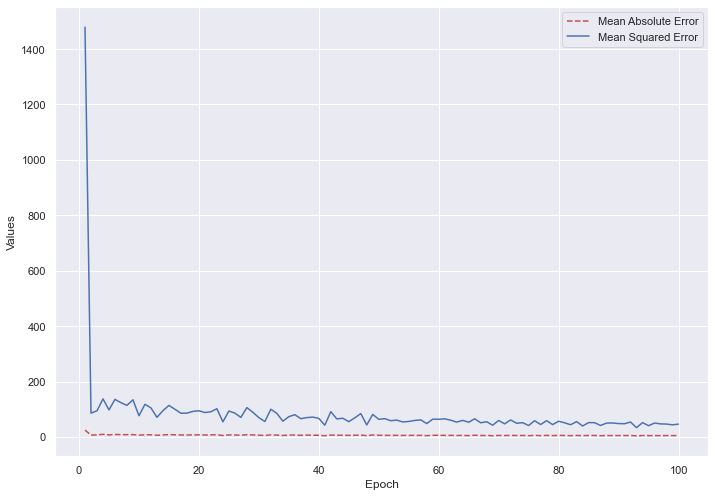

In [277]:
# Get training and test loss histories
mae_values = history.history['mae']
mse_values = history.history['mse']

# Create count of the number of epochs
epoch_count = range(1, len(mae_values) + 1)

# Visualize loss history
plt.plot(epoch_count, mae_values, 'r--')
plt.plot(epoch_count, mse_values, 'b-')
plt.legend(['Mean Absolute Error', 'Mean Squared Error'])
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.show();

In [278]:
loss, mae, mse = model.evaluate(X_train, y_train, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

13/13 - 0s - loss: 34.9082 - mae: 4.6571 - mse: 34.9082 - 148ms/epoch - 11ms/step
Testing set Mean Abs Error:  4.66 MEDV


In [279]:
# for overfitting here we increase testing and validation dataset and decrease the training dataset
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.1, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(51, 13)
(227, 13)
(228, 13)
(51,)
(227,)
(228,)


In [280]:
EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, verbose=0)

In [281]:
hist_ovefit = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
95,50.271275,5.142365,50.271275,95
96,47.293652,4.749972,47.293652,96
97,46.594322,5.080574,46.594322,97
98,43.854351,4.975783,43.854351,98
99,46.519318,5.046816,46.519318,99


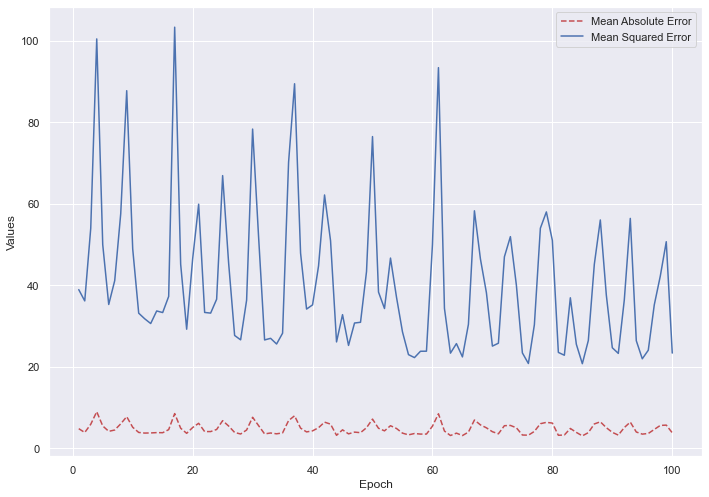

In [282]:
# Get training and test loss histories
mae_values = history.history['mae']
mse_values = history.history['mse']

# Create count of the number of epochs
epoch_count = range(1, len(mae_values) + 1)

# Visualize loss history
plt.plot(epoch_count, mae_values, 'r--')
plt.plot(epoch_count, mse_values, 'b-')
plt.legend(['Mean Absolute Error', 'Mean Squared Error'])
plt.xlabel('Epoch')
plt.ylabel('Values')
plt.show();

In [283]:
loss, mae, mse = model.evaluate(X_train, y_train, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

2/2 - 0s - loss: 19.2289 - mae: 2.9291 - mse: 19.2289 - 32ms/epoch - 16ms/step
Testing set Mean Abs Error:  2.93 MEDV
